# Pre analysis of the dataset

In [3]:
count

1

In [1]:
YOUTUBEPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/Final  Assignments/Docker/data/MainFileCombined_clean_1.csv"
YOUTUBEPATH=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFileCombined_clean_1.csv"

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import  re
import glob
import os
import requests
from bs4 import BeautifulSoup
import zipfile
from os.path import basename
from pathlib import Path
import time
import shutil
import chardet
import datetime

In [322]:
videoscollist
with open(YOUTUBEPATH, 'rb') as f:
    result = chardet.detect(f.read())

KeyboardInterrupt: 

In [ ]:
result.head()

In [3]:
videoscollist=['videoID','userID','videoAge','category','length','views','rating','numberRatings','comments','relVideoID1','relVideoID2','relVideoID3','relVideoID4','relVideoID5','relVideoID6','relVideoID7','relVideoID8','relVideoID9','relVideoID10','relVideoID11','relVideoID12','relVideoID13','relVideoID14','relVideoID15','relVideoID16','relVideoID17','relVideoID18','relVideoID19','relVideoID20']
videos_df=pd.read_csv(YOUTUBEPATH,encoding='ISO-8859-1')



C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,3,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
videos_df.head()

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,relVideoID1,...,relVideoID11,relVideoID12,relVideoID13,relVideoID14,relVideoID15,relVideoID16,relVideoID17,relVideoID18,relVideoID19,relVideoID20
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,DjdA-5oKYFQ,...,vmdPOOd6cxI,KRHfMQqSHpk,pIMpORZthYw,1tUDzOp10pk,heqocRij5P0,_XIuvoH6rUg,LGVU5DsezE0,uO2kj6_D8B4,xiDqywcDQRM,uX81lMev6_o
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,e2k0h6tPvGc,...,EzKwOYLh-S0,eUIfRyrqwp8,AK8Wtfwe-1k,Eq4hGkIqBGw,N1lkLaLJHlc,-uIffs-DHkM,zpTorUhCd8Y,AvSK0qPw7EU,WX5KLMqY4bM,VKFqqoeMdjw
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,eprHhmurMHg,...,yLup8wjbSIo,lbf4d1pZI9c,uRQYan_-CTQ,gnpvEvuiFoQ,F2_5KOnSsfI,DINu35v3eMU,9uSiyn7t_0o,YfShxdbAJS8,ssdfqTwZXY0,z5wDjq8o60c
3,SDNkMu8ZT68,w00dy911,630.0,People & Blogs,186.0,10181.0,3.49,494.0,257.0,rjnbgpPJUks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sRnLdmvQBsI,pdrop,735.0,Entertainment,188.0,67265.0,3.09,302.0,262.0,Xh_ERke6xiM,...,qRnY1myum-c,tYbBlZiB5ic,PvAtc2I0Xsg,uvl-j1hHdXs,-3bxyxMQg3Q,wORY4DCnG7A,LcGrhP3SaYU,VNlmoPvcIcg,Nm1w85EaODw,THm4gpmcUgI


In [15]:
videos_df.columns

Index(['videoID', 'userID', 'videoAge', 'category', 'length', 'views',
       'rating', 'numberRatings', 'comments', 'relVideoID1', 'relVideoID2',
       'relVideoID3', 'relVideoID4', 'relVideoID5', 'relVideoID6',
       'relVideoID7', 'relVideoID8', 'relVideoID9', 'relVideoID10',
       'relVideoID11', 'relVideoID12', 'relVideoID13', 'relVideoID14',
       'relVideoID15', 'relVideoID16', 'relVideoID17', 'relVideoID18',
       'relVideoID19', 'relVideoID20'],
      dtype='object')

In [4]:
videos_df.videoID.count()

7233002

In [15]:
small_df=videos_df.iloc[6500000:7500000]

In [9]:
small_df

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,relVideoID1,...,relVideoID11,relVideoID12,relVideoID13,relVideoID14,relVideoID15,relVideoID16,relVideoID17,relVideoID18,relVideoID19,relVideoID20
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,DjdA-5oKYFQ,...,vmdPOOd6cxI,KRHfMQqSHpk,pIMpORZthYw,1tUDzOp10pk,heqocRij5P0,_XIuvoH6rUg,LGVU5DsezE0,uO2kj6_D8B4,xiDqywcDQRM,uX81lMev6_o
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,e2k0h6tPvGc,...,EzKwOYLh-S0,eUIfRyrqwp8,AK8Wtfwe-1k,Eq4hGkIqBGw,N1lkLaLJHlc,-uIffs-DHkM,zpTorUhCd8Y,AvSK0qPw7EU,WX5KLMqY4bM,VKFqqoeMdjw
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,eprHhmurMHg,...,yLup8wjbSIo,lbf4d1pZI9c,uRQYan_-CTQ,gnpvEvuiFoQ,F2_5KOnSsfI,DINu35v3eMU,9uSiyn7t_0o,YfShxdbAJS8,ssdfqTwZXY0,z5wDjq8o60c
3,SDNkMu8ZT68,w00dy911,630.0,People & Blogs,186.0,10181.0,3.49,494.0,257.0,rjnbgpPJUks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sRnLdmvQBsI,pdrop,735.0,Entertainment,188.0,67265.0,3.09,302.0,262.0,Xh_ERke6xiM,...,qRnY1myum-c,tYbBlZiB5ic,PvAtc2I0Xsg,uvl-j1hHdXs,-3bxyxMQg3Q,wORY4DCnG7A,LcGrhP3SaYU,VNlmoPvcIcg,Nm1w85EaODw,THm4gpmcUgI


In [11]:
df1 = pd.melt(small_df, id_vars='videoID',value_vars=['relVideoID1', 'relVideoID2',
       'relVideoID3', 'relVideoID4', 'relVideoID5', 'relVideoID6',
       'relVideoID7', 'relVideoID8', 'relVideoID9', 'relVideoID10',
       'relVideoID11', 'relVideoID12', 'relVideoID13', 'relVideoID14',
       'relVideoID15', 'relVideoID16', 'relVideoID17', 'relVideoID18',
       'relVideoID19', 'relVideoID20']).drop('variable', axis=1)
df1

,videoID,value
0,LKh7zAJ4nwo,DjdA-5oKYFQ
1,7D0Mf4Kn4Xk,e2k0h6tPvGc
2,n1cEq1C8oqQ,eprHhmurMHg
3,SDNkMu8ZT68,rjnbgpPJUks
4,sRnLdmvQBsI,Xh_ERke6xiM
5,fQShwYqGqsw,fQShwYqGqsw
6,mWzdp7Cg41w,hIbPgEyOGs4
7,-keC9GymLpI,OPtkzcaPe1c
8,H-ucblRMjuY,9jEZyxFs1C0
9,jDRENHHatx4,yWyq_40s5kQ


In [14]:
colstokeep=['videoID','relVideoID1', 'relVideoID2',
       'relVideoID3', 'relVideoID4', 'relVideoID5', 'relVideoID6',
       'relVideoID7', 'relVideoID8', 'relVideoID9', 'relVideoID10',
       'relVideoID11', 'relVideoID12', 'relVideoID13', 'relVideoID14',
       'relVideoID15', 'relVideoID16', 'relVideoID17', 'relVideoID18',
       'relVideoID19', 'relVideoID20']
df2 = small_df[colstokeep].set_index('videoID').stack().reset_index(level=1, drop=True).reset_index(name='relatedVideoID')
df2.dropna(subset=['relatedVideoID'])

,videoID,relatedVideoID
0,LKh7zAJ4nwo,DjdA-5oKYFQ
1,LKh7zAJ4nwo,NxTDlnOuybo
2,LKh7zAJ4nwo,c-8VuICzXtU
3,LKh7zAJ4nwo,DH56yrIO5nI
4,LKh7zAJ4nwo,W1Uo5DQTtzc
5,LKh7zAJ4nwo,E-3zXq_r4w0
6,LKh7zAJ4nwo,1TCeoRPg5dE
7,LKh7zAJ4nwo,yAr26YhuYNY
8,LKh7zAJ4nwo,2ZgXx72XmoE
9,LKh7zAJ4nwo,-7ClGo-YgZ0


In [53]:
def transformVideosToRelations(inputDF,relfilename):
    counter=1
    colstokeep=['videoID','relVideoID1', 'relVideoID2',
           'relVideoID3', 'relVideoID4', 'relVideoID5', 'relVideoID6',
           'relVideoID7', 'relVideoID8', 'relVideoID9', 'relVideoID10',
           'relVideoID11', 'relVideoID12', 'relVideoID13', 'relVideoID14',
           'relVideoID15', 'relVideoID16', 'relVideoID17', 'relVideoID18',
           'relVideoID19', 'relVideoID20']
    inc=500000
    startindex=0
    endindex=inc
    rangeinc=int(inputDF.videoID.count()/inc)
    print("BEGIN Process -- Converting Videos File to Relationships")
    with open(relfilename,'a') as fil:
        for i in range(1,rangeinc+1):
            df2 = inputDF.iloc[startindex:endindex][colstokeep].set_index('videoID').stack().reset_index(level=1, drop=True).reset_index(name='relatedVideoID')
            df2.dropna(subset=['relatedVideoID'])
            df2=df2[df2['videoID']!=df2['relatedVideoID']]
            df2.to_csv(fil,index=False,encoding='ISO-8859-1')
            startindex=endindex
            endindex=endindex+inc
            print("Processing "+str(counter/rangeinc*100)+"% completed")
            counter+=1
    print("END Process -- Converting Videos File to Relationships")

In [51]:
def transformVideosToUserUploads(inputDF,relfilename):
    with open(relfilename,'a') as fil:
        inputDF[['videoID','userID']].to_csv(fil,index=False,encoding='ISO-8859-1')

In [52]:
useruploadsfilename=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\UserUploads.csv"
transformVideosToUserUploads(videos_df,useruploadsfilename)

In [55]:
relfilename=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\VideoRelationships.csv"

transformVideosToRelations(videos_df,relfilename)

BEGIN Process -- Converting Videos File to Relationships
Processing 7.142857142857142% completed
Processing 14.285714285714285% completed
Processing 21.428571428571427% completed
Processing 28.57142857142857% completed
Processing 35.714285714285715% completed
Processing 42.857142857142854% completed
Processing 50.0% completed
Processing 57.14285714285714% completed
Processing 64.28571428571429% completed
Processing 71.42857142857143% completed
Processing 78.57142857142857% completed
Processing 85.71428571428571% completed
Processing 92.85714285714286% completed
Processing 100.0% completed
END Process -- Converting Videos File to Relationships


In [ ]:
colstokeep=['videoID','relVideoID1', 'relVideoID2',
       'relVideoID3', 'relVideoID4', 'relVideoID5', 'relVideoID6',
       'relVideoID7', 'relVideoID8', 'relVideoID9', 'relVideoID10',
       'relVideoID11', 'relVideoID12', 'relVideoID13', 'relVideoID14',
       'relVideoID15', 'relVideoID16', 'relVideoID17', 'relVideoID18',
       'relVideoID19', 'relVideoID20']
df3 = videos_df[colstokeep].set_index('videoID').stack().reset_index(level=1, drop=True).reset_index(name='relatedVideoID')
df3.dropna(subset=['relatedVideoID'])
df3.to_csv("VideoRelationships.csv",index='False',encoding='ISO-8859-1')

In [21]:
count = 0
for index, row in videos_df.iterrows():
    print(row['videoID'] +""+ row['relVideoID1'])
    count+=1
    if count == 5:
        break

LKh7zAJ4nwoDjdA-5oKYFQ
7D0Mf4Kn4Xke2k0h6tPvGc
n1cEq1C8oqQeprHhmurMHg
SDNkMu8ZT68rjnbgpPJUks
sRnLdmvQBsIXh_ERke6xiM


In [18]:
len(videos_df.videoID.unique())

7233002

In [332]:
videos_df.dtypes

videoID           object
userID            object
videoAge         float64
category          object
length           float64
views            float64
rating           float64
numberRatings    float64
comments         float64
relVideoID1       object
relVideoID2       object
relVideoID3       object
relVideoID4       object
relVideoID5       object
relVideoID6       object
relVideoID7       object
relVideoID8       object
relVideoID9       object
relVideoID10      object
relVideoID11      object
relVideoID12      object
relVideoID13      object
relVideoID14      object
relVideoID15      object
relVideoID16      object
relVideoID17      object
relVideoID18      object
relVideoID19      object
relVideoID20      object
dtype: object

# Distribution of various Featres of the Videos

In [241]:
videos_df.drop_duplicates(subset='videoID',inplace=True,keep="last")

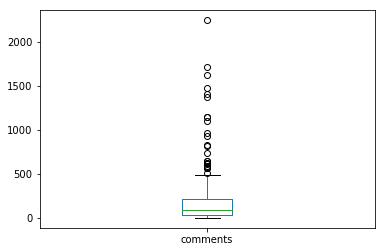

In [29]:
videos_df['comments'].plot(kind='box')
plt.show()

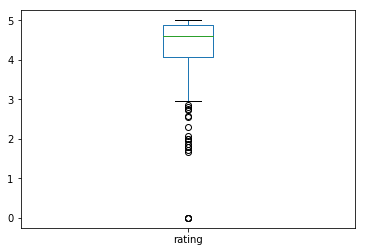

In [30]:
videos_df['rating'].plot(kind='box')
plt.show()

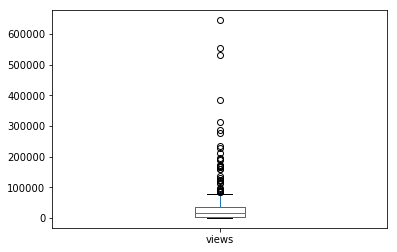

In [31]:
videos_df['views'].plot(kind='box')
plt.show()

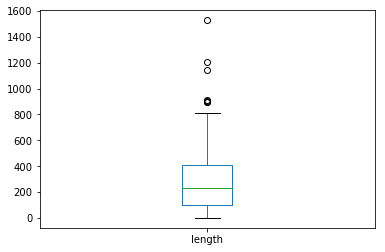

In [33]:
videos_df['length'].plot(kind='box')
plt.show()

In [34]:
videos_df.category.unique()

array(['Entertainment', 'Sports', 'Film & Animation', 'News & Politics',
       'Autos & Vehicles', 'Music', 'People & Blogs', ' UNA ', 'Comedy',
       'Gadgets & Games', 'Pets & Animals', 'Howto & DIY',
       'Travel & Places'], dtype=object)

In [70]:
concat_df = []
videoscollist=['videoID','userID','videoAge','category','length','views','rating','numberRatings','comments','relVideoID1','relVideoID2','relVideoID3','relVideoID4','relVideoID5','relVideoID6','relVideoID7','relVideoID8','relVideoID9','relVideoID10','relVideoID11','relVideoID12','relVideoID13','relVideoID14','relVideoID15','relVideoID16','relVideoID17','relVideoID18','relVideoID19','relVideoID20']

for filename in glob.iglob(YOUTUBEPATH+"/*.txt", recursive=True):
    if re.match("[0-9]", os.path.basename(filename), flags=0):
        #print(os.path.basename(filename))
        concat_df.append(pd.read_csv(r""+YOUTUBEPATH+os.path.basename(filename),delimiter="\t",names=videoscollist))
concat_df=pd.concat(concat_df)


In [11]:
# Function gets all sample links
def getDownloadLinksFrom(filetype,downPath,downloadurl):
    #params = {"username":username,"password":password,"action":"acceptTandC","accept":"Yes","acceptSubmit":"Continue"}
    page = requests.get(downloadurl)
    soup = BeautifulSoup(page.content, 'html.parser')
    downloadlinks=soup.find_all('a')
    downlink=""
    downfilename=""
    downfilesDict=[]
    counter = 0
    for link in downloadlinks:
        if filetype=="MainCrawl":
            if ".zip" in link.text:
                if "u" in link.text:
                    break
                if link.text=="080707.zip":
                    break
                downfilesDict.append(link.text)
                '''
                if counter == 15:
                    downfilesDict.append(link.text)
                    counter+=1
                else:
                    counter+=1
                '''
        elif filetype=="UpdateCrawl":
            if "u.zip" in link.text:
                downfilesDict.append(link.text)
        elif filetype=="SizeAndBitrateCrawl":
            sizeRateList = ['0523.zip','0628.zip','080908sizerate.zip']
            if link.text in sizeRateList:
                downfilesDict.append(link.text)
        elif filetype=="UserCrawl":
            userList=['0528.zip','080903user.zip']
            if link.text in userList:
                #downloadExtractRemove(downloadurl+link['href'],downPath,link.text)
                downfilesDict.append(link.text)
    return downfilesDict

In [4]:
def downloadExtractRemove(filetype,link,extractpath,filename):
    filepath=extractpath+"/"+filename
    downfile = requests.get(link)
    filelist = []
    with open(filepath, "wb") as fil:
        fil.write(downfile.content)
    with open(filepath, "rb") as file:
        zip_ref = zipfile.ZipFile(file)
        zip_ref.extractall(extractpath)
        z = zip_ref.filelist
        #print(filename.split(".")[0])
        folderPath=extractpath+"/"+filename.split(".")[0]
        for f in glob.iglob(folderPath+"/*.txt", recursive=True):
            if "log.txt" not in f:
                if filetype=="MainCrawl":
                    filelist.append(r""+f)
        zip_ref.close()
    os.remove(filepath)
    return filelist

In [28]:
def cleanMainFile(to_be_cleaned_df):
    to_be_cleaned_df.update(to_be_cleaned_df[['videoAge','length','views','rating','numberRatings','comments']].fillna(0))
    to_be_cleaned_df.drop_duplicates(subset='videoID',inplace=True,keep="last")
    return to_be_cleaned_df

In [24]:
def processMainfileCrawl(filelist,filepath):
    todays_file = Path(filepath)
    if not todays_file.is_file():
        headerFlag=True
    else:
        headerFlag=False
    videoscollist=['videoID','userID','videoAge','category','length','views','rating','numberRatings','comments','relVideoID1','relVideoID2','relVideoID3','relVideoID4','relVideoID5','relVideoID6','relVideoID7','relVideoID8','relVideoID9','relVideoID10','relVideoID11','relVideoID12','relVideoID13','relVideoID14','relVideoID15','relVideoID16','relVideoID17','relVideoID18','relVideoID19','relVideoID20']
    concat_df = []
    for fil in filelist:
        with open(fil,"r"):
            concat_df.append(pd.read_csv(fil,delimiter="\t",names=videoscollist,encoding='ISO-8859-1'))
        os.remove(fil)
    concat_df=pd.concat(concat_df)
    concat_df=cleanMainFile(concat_df)
    with open(filepath, 'a') as f:
        concat_df.to_csv(f, header=headerFlag,index=False,encoding='ISO-8859-1')

In [21]:
dict = {"UserCrawl":""}
YOUTUBEDOWNPATH="C:/Users/visha/Desktop/ADS Project Datasets/youtube/TestDownloads2/"
YOUTUBELINK="http://netsg.cs.sfu.ca/youtubedata/"
dict["MainCrawl"]=getDownloadLinksFrom("MainCrawl",YOUTUBEDOWNPATH,YOUTUBELINK)
mainFileDownPathRaw=YOUTUBEDOWNPATH+"/MainFileCombined_raw.csv"
mainFileDownPathClean=YOUTUBEDOWNPATH+"/MainFileCombined_clean.csv"
counter = 0
for filename in dict["MainCrawl"]:
    filelist=downloadExtractRemove("MainCrawl",YOUTUBELINK+filename,YOUTUBEDOWNPATH,filename)
    '''
    for f in filelist:
        print("filelist : "+f)
    '''
    if counter == 10:
        time.sleep(60)
        counter=0
    counter+=1
    processMainfileCrawl(filelist,mainFileDownPathRaw)
    #ad code to log
    print("Processing "+filename.split(".")[0])
    shutil.rmtree(YOUTUBEDOWNPATH+"/"+filename.split(".")[0])

df=pd.read_csv(mainFileDownPathRaw)
df.drop_duplicates(subset='videoID',inplace=True,keep="last",encoding='ISO-8859-1')
df.to_csv(mainFileDownPathClean,index=False,encoding='ISO-8859-1')
os.remove(mainFileDownPathRaw)

Processing 0222
Processing 0301
Processing 0302
Processing 0303
Processing 0305
Processing 0306
Processing 0309
Processing 0313
Processing 0314
Processing 0315
Processing 0316
Processing 0318
Processing 0320
Processing 0322
Processing 0325
Processing 0327
Processing 0329
Processing 0403
Processing 0410
Processing 0413
Processing 0418
Processing 0420
Processing 0422
Processing 0424
Processing 0426
Processing 0428
Processing 0430


C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (1,3,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Processing 0502
Processing 0505
Processing 0507
Processing 0509
Processing 0511
Processing 0513
Processing 0515
Processing 0518
Processing 080327
Processing 080329
Processing 080331
Processing 080402
Processing 080404
Processing 080406
Processing 080408
Processing 080412
Processing 080414
Processing 080416
Processing 080418
Processing 080422
Processing 080424
Processing 080426
Processing 080428
Processing 080430
Processing 080502
Processing 080504
Processing 080506
Processing 080508
Processing 080510
Processing 080512
Processing 080514
Processing 080516
Processing 080518
Processing 080520
Processing 080522
Processing 080524
Processing 080526
Processing 080528
Processing 080530
Processing 080601
Processing 080603
Processing 080605
Processing 080609
Processing 080611
Processing 080613
Processing 080615
Processing 080617
Processing 080619
Processing 080621
Processing 080623
Processing 080625
Processing 080627
Processing 080629
Processing 080701
Processing 080703
Processing 080705


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte

In [83]:
concat_df.category.value_counts()

Music               10889
Entertainment        9794
Comedy               6276
Film & Animation     4798
Sports               4205
People & Blogs       3981
Gadgets & Games      3383
News & Politics      2882
Autos & Vehicles     1991
Travel & Places      1051
Pets & Animals        987
Howto & DIY           965
 UNA                  420
Name: category, dtype: int64

In [45]:
from neo4j.v1 import GraphDatabase, basic_auth

  driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "neo4jpasswd"))
  session = driver.session()

  session.run("CREATE (a:Person {name: {name}, title: {title}})",
              {"name": "Arthur", "title": "King"})

  result = session.run("MATCH (a:Person) WHERE a.name = {name} "
                       "RETURN a.name AS name, a.title AS title",
                       {"name": "Arthur"})
  for record in result:
      print("%s %s" % (record["title"], record["name"]))

    
    
  session.close()

IndentationError: unexpected indent (<ipython-input-45-dcb0150c8f6d>, line 3)

In [27]:
print(datetime.datetime.now())

2017-08-08 20:40:03.214840
